In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # Already scaled, but ensure
import matplotlib.pyplot as plt

# Load cleaned dataset (from preprocessing)
df_cleaned = pd.read_csv('cleaned_heart_disease.csv')

# Separate features and target
X = df_cleaned.drop('target', axis=1)  # Features only
y = df_cleaned['target']

# Ensure features are scaled (redundant if done in preprocessing, but safe)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine optimal number of components (e.g., for 95% variance)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # First index where >=95%
print(f"Optimal number of components for 95% variance: {n_components}")

# Re-apply PCA with optimal components
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)



Optimal number of components for 95% variance: 17


In [4]:
# Save PCA-transformed dataset
pca_df = pd.DataFrame(X_pca_optimal, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['target'] = y  # Add target for reference
pca_df.to_csv('pca_transformed_heart_disease.csv', index=False)
print("PCA-transformed dataset saved as 'pca_transformed_heart_disease.csv'.")

PCA-transformed dataset saved as 'pca_transformed_heart_disease.csv'.


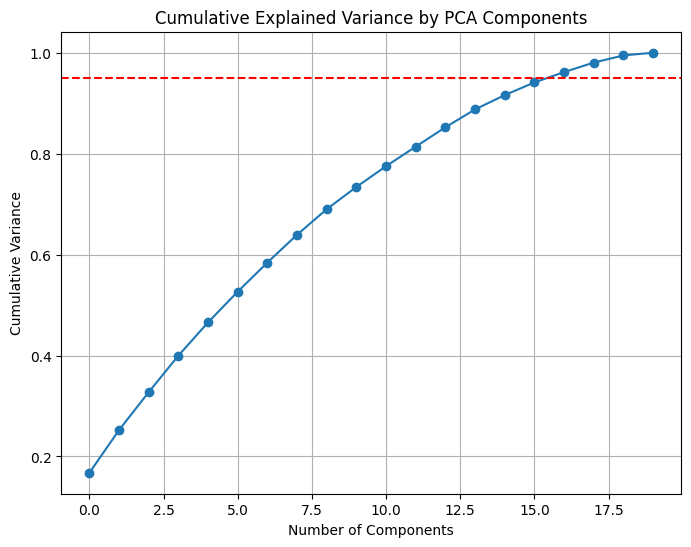

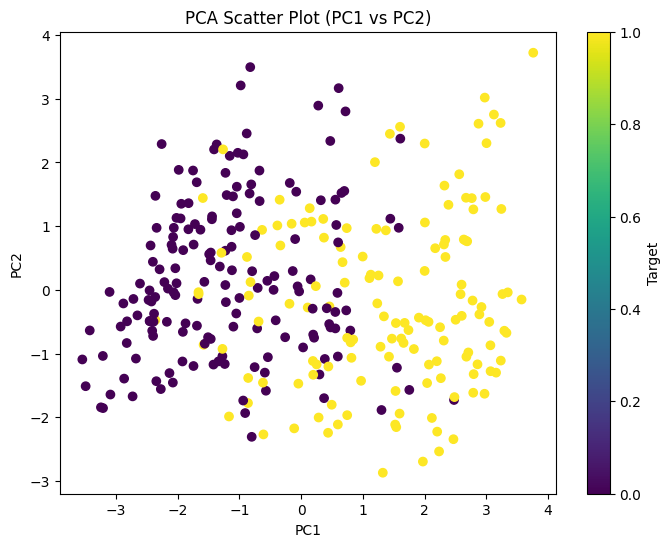

In [5]:
# Visualization: Cumulative variance plot
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

# Visualization: Scatter plot of first two PCs
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Target')
plt.show()